<a href="https://colab.research.google.com/github/zainamri/tugas/blob/main/mentalhealth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [170]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shariful07/student-mental-health")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/student-mental-health


In [171]:
# Menyediakan path ke dataset yang diunduh (gunakan path yang diberikan dari API)
dataset_path = path + '/Student Mental health.csv'
data = pd.read_csv(dataset_path)

# Cek isi dataset
data.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [173]:
# Converting categorical columns into numeric using Label Encoding
label_encoder = LabelEncoder()

# Convert categorical columns to numeric
data['Choose your gender'] = label_encoder.fit_transform(data['Choose your gender'])
data['What is your course?'] = label_encoder.fit_transform(data['What is your course?'])
data['Your current year of Study'] = label_encoder.fit_transform(data['Your current year of Study'])
data['Marital status'] = label_encoder.fit_transform(data['Marital status'])
data['Do you have Depression?'] = label_encoder.fit_transform(data['Do you have Depression?'])
data['Do you have Anxiety?'] = label_encoder.fit_transform(data['Do you have Anxiety?'])
data['Do you have Panic attack?'] = label_encoder.fit_transform(data['Do you have Panic attack?'])
data['Did you seek any specialist for a treatment?'] = label_encoder.fit_transform(data['Did you seek any specialist for a treatment?'])

# Checking the data after conversion
data.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,0,18.0,17,3,3.00 - 3.49,0,1,0,1,0
1,8/7/2020 12:04,1,21.0,25,4,3.00 - 3.49,0,0,1,0,0
2,8/7/2020 12:05,1,19.0,4,0,3.00 - 3.49,0,1,1,1,0
3,8/7/2020 12:06,0,22.0,33,5,3.00 - 3.49,1,1,0,0,0
4,8/7/2020 12:13,1,23.0,37,6,3.00 - 3.49,0,0,0,0,0


In [174]:
# Extracting the middle value from the CGPA range and converting it to float
def convert_cgpa(cgpa_range):
    # Splitting the range by ' - ' and calculating the average
    if isinstance(cgpa_range, str):
        cgpa_min, cgpa_max = cgpa_range.split(' - ')
        return (float(cgpa_min) + float(cgpa_max)) / 2
    return cgpa_range  # for cases where the value is already numeric

# Applying the function to the 'What is your CGPA?' column
data['What is your CGPA?'] = data['What is your CGPA?'].apply(convert_cgpa)

# Checking the data after conversion
data.head()


,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,0,18.0,17,3,3.245,0,1,0,1,0
1,8/7/2020 12:04,1,21.0,25,4,3.245,0,0,1,0,0
2,8/7/2020 12:05,1,19.0,4,0,3.245,0,1,1,1,0
3,8/7/2020 12:06,0,22.0,33,5,3.245,1,1,0,0,0
4,8/7/2020 12:13,1,23.0,37,6,3.245,0,0,0,0,0


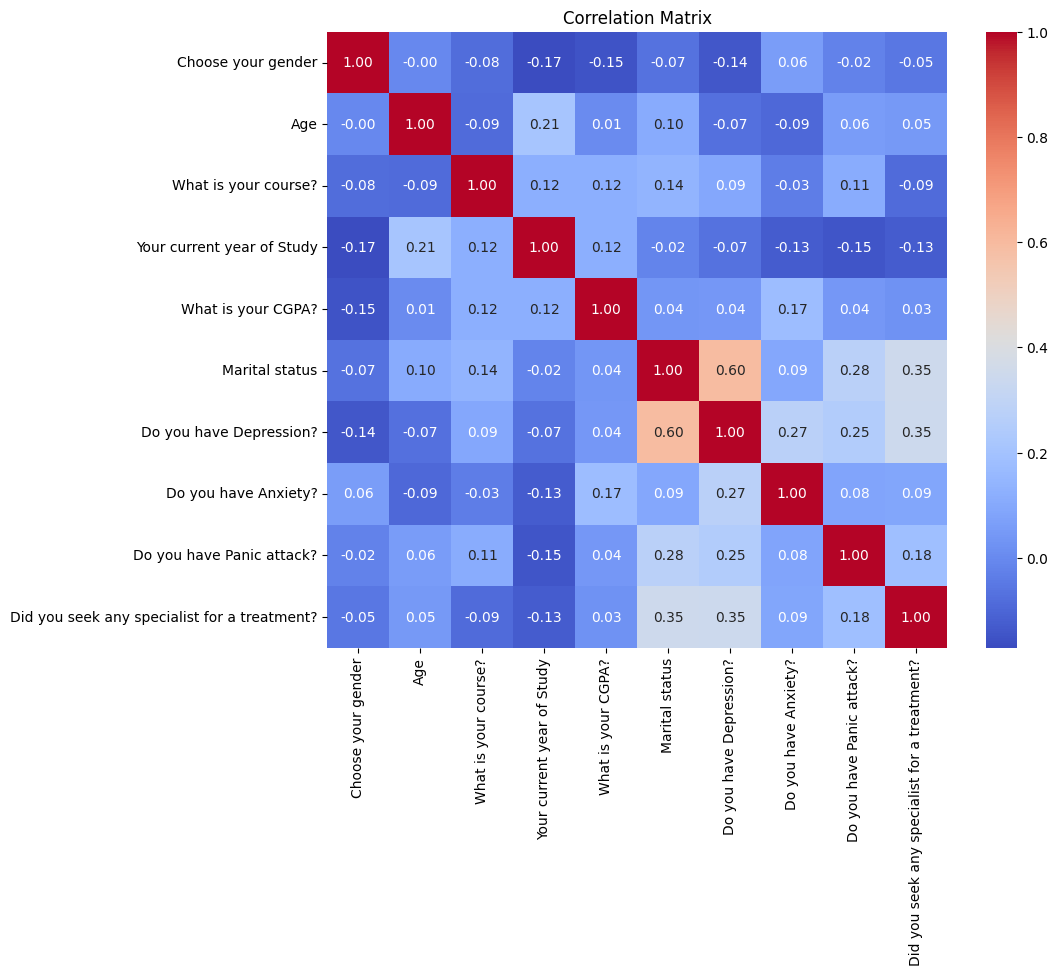

In [175]:
# Drop the 'Timestamp' column since it's not relevant for correlation
data_cleaned = data.drop(columns=['Timestamp'])

# Calculating the correlation matrix
correlation_matrix = data_cleaned.corr()

# Displaying the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [176]:
data.describe()

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
count,101.000000,100.00000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.257426,20.53000,17.059406,2.871287,3.356287,0.158416,0.346535,0.336634,0.326733,0.059406
std,0.439397,2.49628,14.008442,1.418897,0.585152,0.366952,0.478239,0.474915,0.471358,0.237562
min,0.000000,18.00000,0.000000,0.000000,0.995000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.00000,4.000000,2.000000,3.245000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,19.00000,17.000000,3.000000,3.245000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,23.00000,28.000000,3.000000,3.750000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,24.00000,48.000000,6.000000,3.750000,1.000000,1.000000,1.000000,1.000000,1.000000


In [177]:
# Checking for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64


In [178]:
# Imputasi missing value di kolom 'Age' dengan median
data['Age'] = data['Age'].fillna(data['Age'].median())

In [179]:
# Checking for missing values after Imputation
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Timestamp                                       0
Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64


In [180]:
# Checking for duplicate rows
duplicates = data.duplicated().sum()
print(f"Duplicate Entries: {duplicates}")


Duplicate Entries: 0


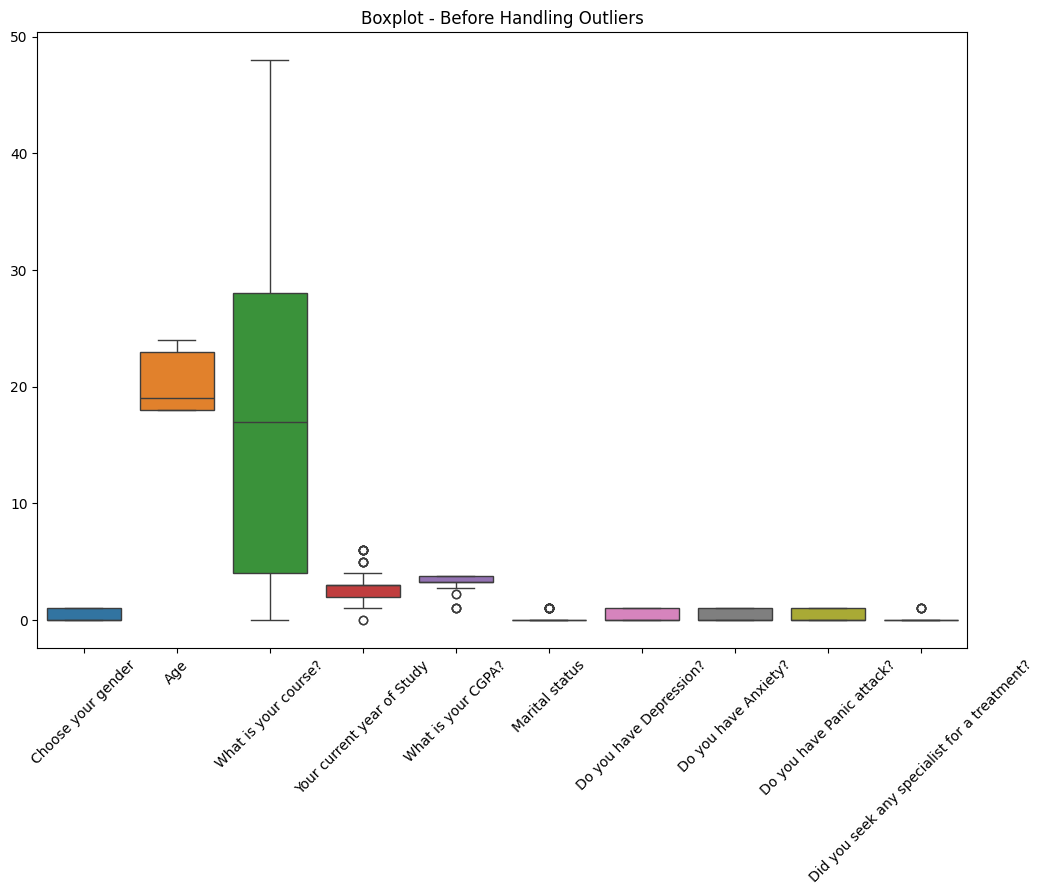

In [181]:
# Defining the numeric columns (excluding the 'Timestamp' column)
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Using IQR to detect and handle outliers
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = ((data[numeric_columns] < (Q1 - 1.5 * IQR)) | (data[numeric_columns] > (Q3 + 1.5 * IQR)))

# Visualizing the outliers before handling
plt.figure(figsize=(12,8))
sns.boxplot(data=data[numeric_columns])
plt.title('Boxplot - Before Handling Outliers')
plt.xticks(rotation=45)
plt.show()


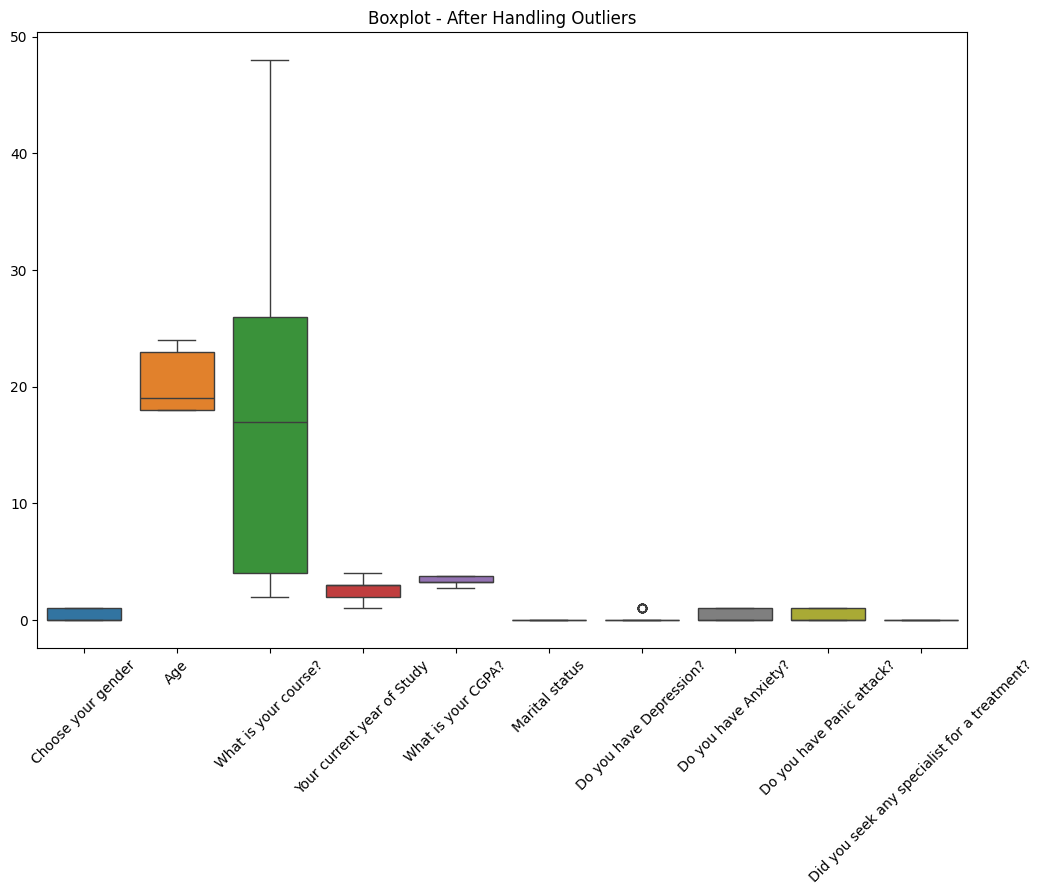

In [182]:
# Handling outliers by removing them
data_cleaned_no_outliers = data[~outlier_condition.any(axis=1)]

# Visualizing the data after handling outliers
plt.figure(figsize=(12,8))
sns.boxplot(data=data_cleaned_no_outliers[numeric_columns])
plt.title('Boxplot - After Handling Outliers')
plt.xticks(rotation=45)
plt.show()

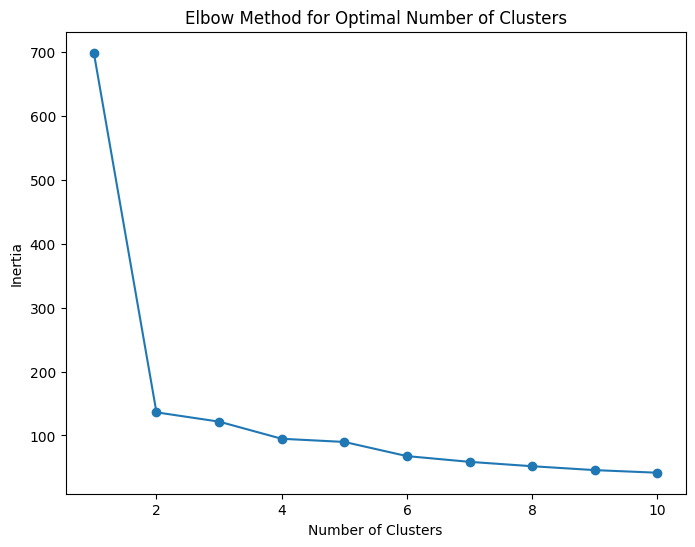

In [183]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Range of cluster numbers to try
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data[clustering_columns])
    distortions.append(kmeans.inertia_)

# Plotting the Elbow Graph
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


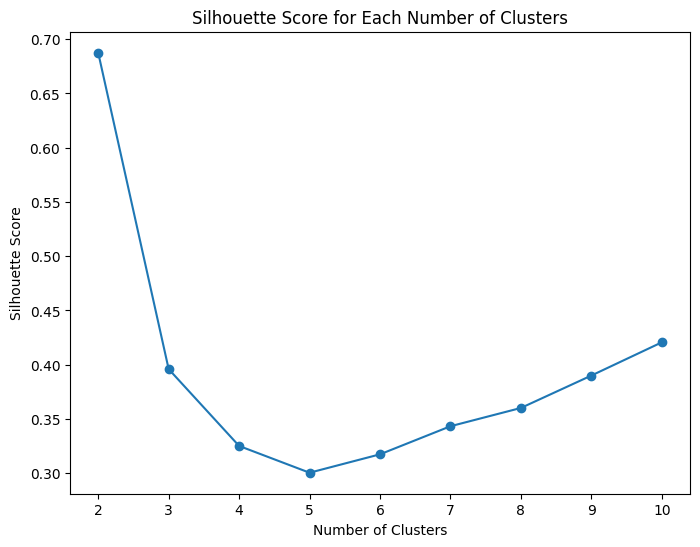

In [184]:
from sklearn.metrics import silhouette_score

scores = []
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data[clustering_columns])
    score = silhouette_score(data[clustering_columns], cluster_labels)
    scores.append(score)

# Plotting Silhouette Scores
plt.figure(figsize=(8,6))
plt.plot(range_n_clusters, scores, marker='o')
plt.title('Silhouette Score for Each Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


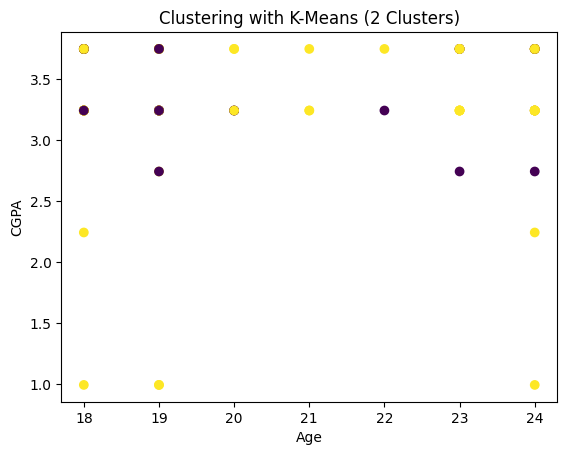

In [185]:
# Selecting relevant columns for clustering based on the correlation matrix
clustering_columns_relevant = ['Marital status', 'Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?', 'Did you seek any specialist for a treatment?']

# Initializing KMeans with 2 clusters (optimal based on silhouette score)
kmeans = KMeans(n_clusters=2, random_state=42)

# Fitting the KMeans model
data['Cluster'] = kmeans.fit_predict(data[clustering_columns_relevant])

# Visualizing the clusters
plt.scatter(data['Age'], data['What is your CGPA?'], c=data['Cluster'], cmap='viridis')
plt.title('Clustering with K-Means (2 Clusters)')
plt.xlabel('Age')
plt.ylabel('CGPA')
plt.show()

In [186]:
# Analyzing the mean of each feature for each cluster
cluster_means = data.groupby('Cluster')[clustering_columns_relevant].mean()
print(cluster_means)

         Marital status  Do you have Depression?  Do you have Anxiety?  \
Cluster                                                                  
0              0.551724                 1.000000              0.620690   
1              0.000000                 0.083333              0.222222   

         Do you have Panic attack?  \
Cluster                              
0                         0.586207   
1                         0.222222   

         Did you seek any specialist for a treatment?  
Cluster                                                
0                                            0.206897  
1                                            0.000000  
